In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
data =  pd.read_csv(r'D:\Downloads\daylio_export.csv', error_bad_lines = False, encoding='latin-1')

In [3]:
data = data.drop(['date','weekday','time','activities', 'note'], axis=1)

In [4]:
#converting the apps mood system into numbers
#the app has 5 ratings for your day, Rad, Good, Meh, Bad, Awful
data = data.replace('awful', -2)
data = data.replace('Depressed', -2)
data = data.replace('bad', -1)
data = data.replace('Anxious', -1)
data = data.replace('meh', 0)
data = data.replace('Boring', 0)
data = data.replace('good', 1)
data = data.replace('Optimistic', 1)
data = data.replace('rad', 2)

In [5]:
data.full_date = pd.to_datetime(data.full_date)

In [6]:
data.columns = ['ds', 'y']

In [7]:
data.head()

,ds,y
0,2020-02-03,0
1,2020-02-02,2
2,2020-02-01,-1
3,2020-01-31,-1
4,2020-01-30,-2


In [16]:
p = Prophet(yearly_seasonality=True)
p.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = p.make_future_dataframe(periods = 365, include_history = True)
forecast = p.predict(future)

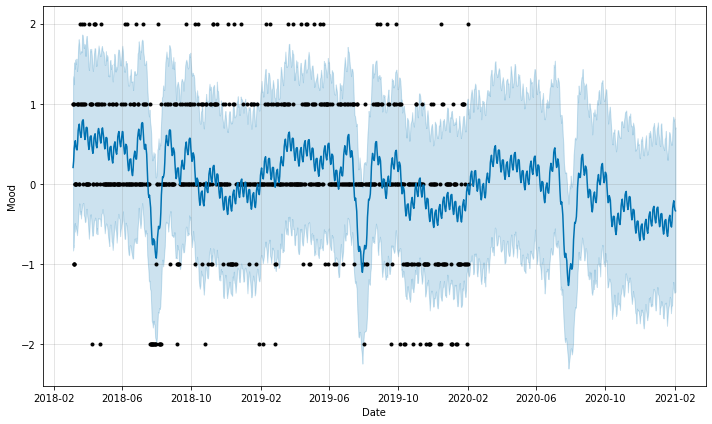

In [18]:
figure = p.plot(forecast, xlabel='Date', ylabel='Mood')

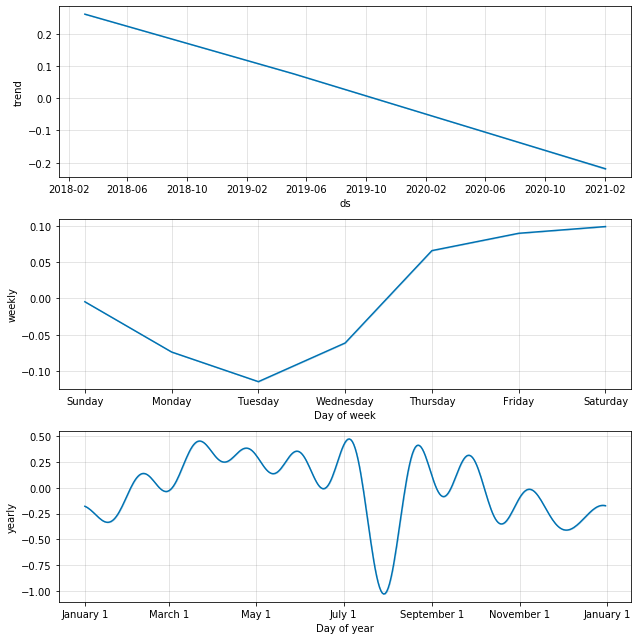

In [19]:
figure2 = p.plot_components(forecast)